## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [16]:
path = r'/Users/margoshogren/Library/CloudStorage/OneDrive-Personal/Documents/Margo-CF Folder-OD/A6 Adv Analytics and Dashboard design/Superstore'

In [17]:
SS = pd.read_csv(os.path.join(path,'Superstore.csv'), encoding = 'Latin-1')

### 2. Data cleaning

In [7]:
SS.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
SS.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [8]:
SS.shape

(9994, 21)

In [9]:
# drop the columns unneeded

SS = SS.drop(columns = ['Row ID', 'Country'])

In [11]:
SS.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### Missing values

In [9]:
# Check for missing values

SS.isnull().sum()

# No missing values to handle

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##### Duplicates check

In [12]:
dups = SS.duplicated()

In [13]:
dups.shape # No dups

(9994,)

##### Extreme values checks

/var/folders/dj/4qjrg2bn07928wblcylhwx240000gn/T/ipykernel_7581/1433388707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SS['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

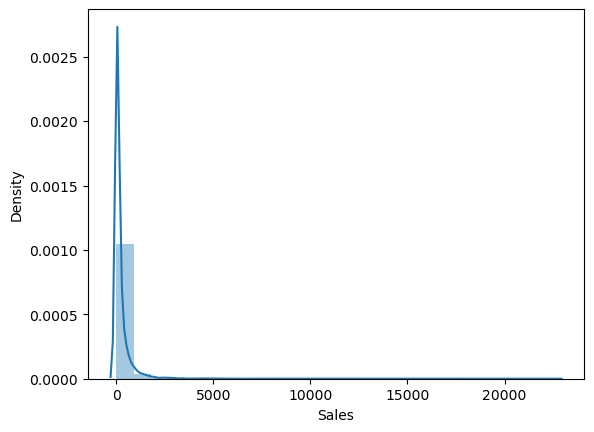

In [15]:
sns.distplot(SS['Sales'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [17]:
SS['Sales'].mean() # Check the mean

229.85800083049833

In [18]:
SS['Sales'].median() # Check the median

54.489999999999995

In [19]:
SS['Sales'].max() # Check the max

22638.48

### 3. Data prep for regression analysis 

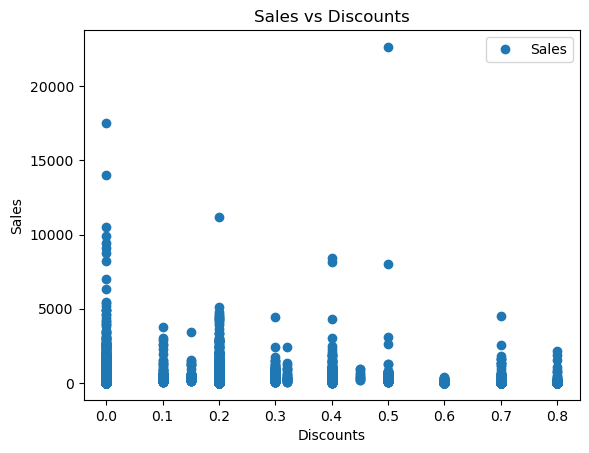

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

SS.plot(x = 'Discount', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Discounts')  
plt.xlabel('Discounts')  
plt.ylabel('Sales')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = SS['Discount'].values.reshape(-1,1)
y = SS['Sales'].values.reshape(-1,1)

In [22]:
X

array([[0. ],
       [0. ],
       [0. ],
       ...,
       [0.2],
       [0. ],
       [0. ]])

In [23]:
y

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

### Hypothesis 1: Sales will be increased when there is more discount

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

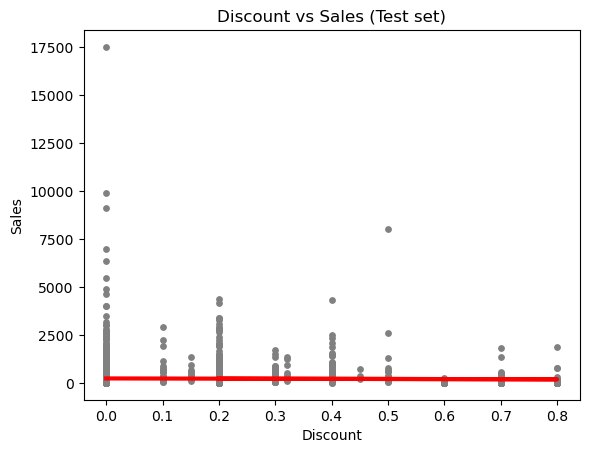

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Discount vs Sales (Test set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Sales')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-56.29364623]]
Mean squared error:  422691.7311885791
R2 score:  0.0009005788018273675


### Inference: 
    Negative slope indicates that as discount rises, Sales drops
    Mean Squared Error (MSE) is very large indicating that this model is not a good fit
    R2 score is very small indicating that is model does not explain the variance of data

In [31]:
y_predicted

array([[234.23958624],
       [234.23958624],
       [222.980857  ],
       ...,
       [234.23958624],
       [234.23958624],
       [222.980857  ]])

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,234.239586
1,22.6600,234.239586
2,35.2080,222.980857
3,283.9200,222.980857
4,19.8240,222.980857
5,39.9200,222.980857
6,68.4800,222.980857
7,1591.0200,234.239586
8,156.3728,216.225619
9,3499.9300,234.239586


##### Compare how the regression fits the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-56.29364623]]
Mean squared error:  373328.996014331
R2 score:  0.0003607628341824043


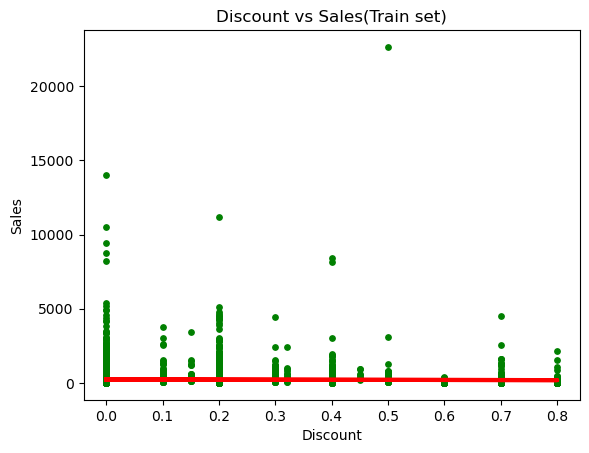

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Discount vs Sales(Train set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Sales')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [30]:
# Clean the extreme values from the "Sales" variable observed during the consistency checks.

df_test = SS[SS['Sales'] <=5000] 

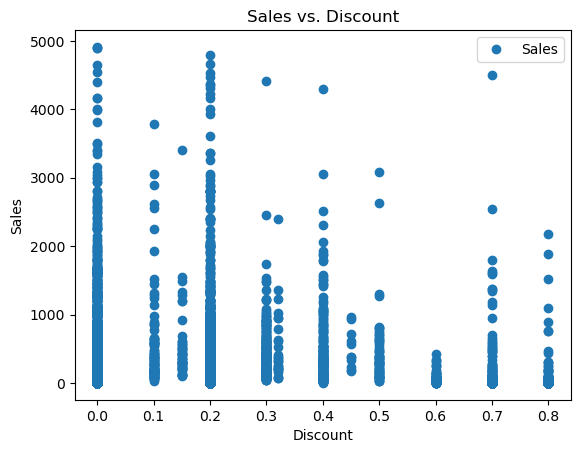

In [32]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Discount', y='Sales', style='o')  
plt.title('Sales vs. Discount')  
plt.xlabel('Discount')  
plt.ylabel('Sales')  
plt.show()

In [42]:
# Reshape again.

X_2 = SS['Discount'].values.reshape(-1,1)
y_2 = SS['Sales'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-56.29364623]]
Mean squared error:  422691.7311885791
R2 score:  0.0009005788018273675


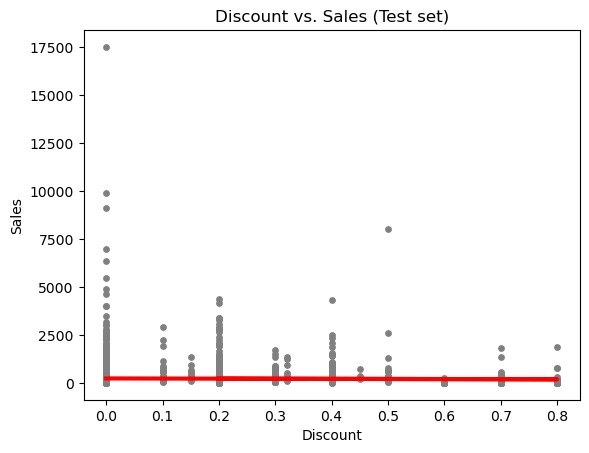

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Discount vs. Sales (Test set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Sales')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,234.239586
1,22.6600,234.239586
2,35.2080,222.980857
3,283.9200,222.980857
4,19.8240,222.980857
5,39.9200,222.980857
6,68.4800,222.980857
7,1591.0200,234.239586
8,156.3728,216.225619
9,3499.9300,234.239586


### Inference:
    Eliminating outliers does not affect earlier results.

___________________________________________________________________________________________________________________

### Hypothesis 2: 
    More Sales will mean more profit


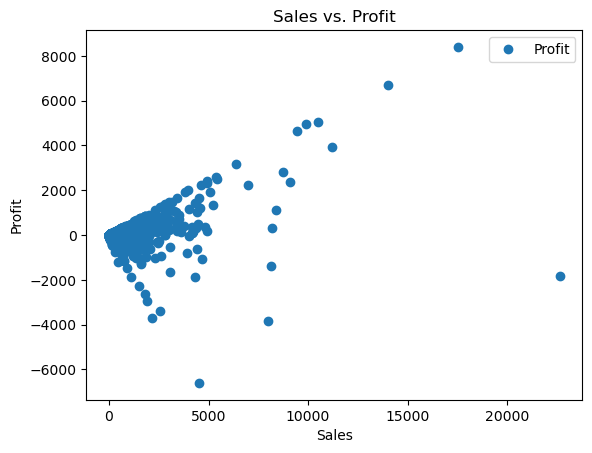

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

SS.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs. Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = SS['Sales'].values.reshape(-1,1)
y = SS['Profit'].values.reshape(-1,1)

In [27]:
X

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [28]:
y

array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

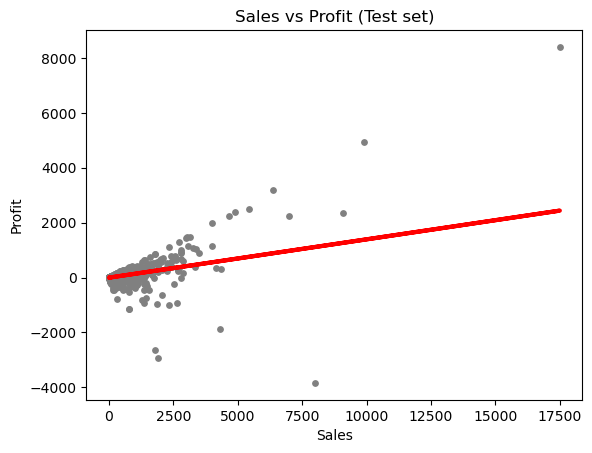

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  51349.12515753704
R2 score:  0.30776582766799


In [37]:
y_predicted

array([[-1.75662971e+00],
       [-1.85432563e+00],
       [-1.03056598e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136527e+00],
       [ 2.24946099e+00]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


### Compare how the regression fits the training set¶

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  39304.148923188775
R2 score:  0.15617731199139895


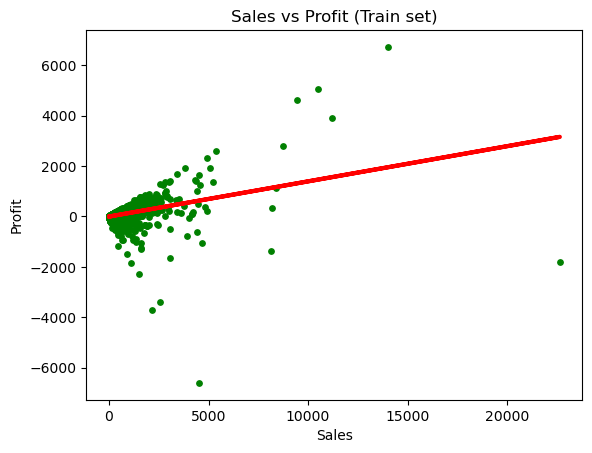

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

#### Bonus: performance improvement after removing outliers

In [44]:
# Clean the extreme values from the "Sales" variable observed during the consistency checks.

df_test = SS[SS['Sales'] <=5000] 

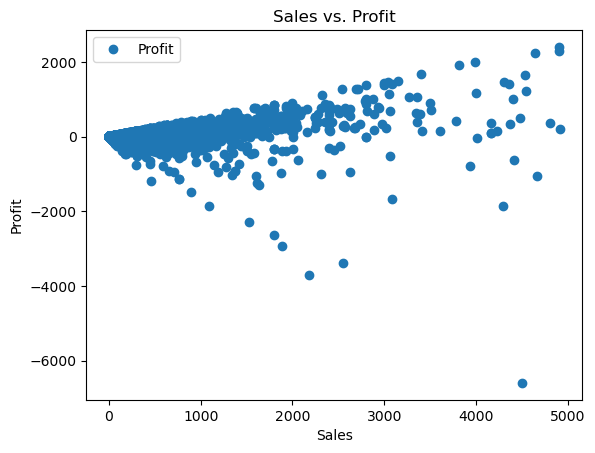

In [70]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sales', y='Profit', style='o')  
plt.title('Sales vs. Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

#### Inference:
    The scatterplot shows negative or low profit for sales under 2,000

In [71]:
# Reshape again.

X_2 = SS['Sales'].values.reshape(-1,1)
y_2 = SS['Profit'].values.reshape(-1,1)

In [72]:
# split data into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [73]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [74]:
# Predict the values of profit(y) using sales (X).

y_predicted = regression.predict(X_test)

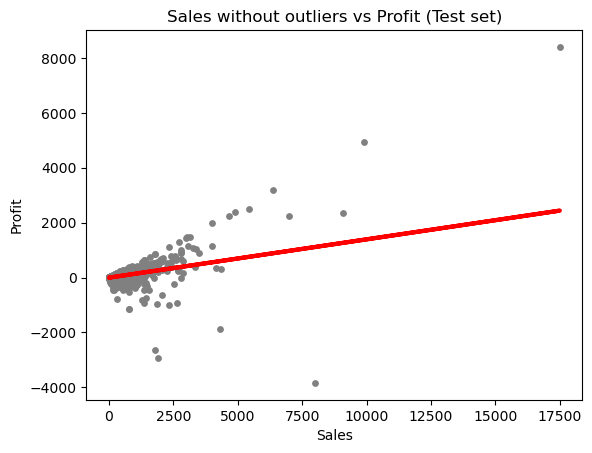

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales without outliers vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [76]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [77]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  51349.12515753704
R2 score:  0.30776582766799


In [78]:
y_predicted

array([[-1.75662971e+00],
       [-1.85432563e+00],
       [-1.03056598e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136527e+00],
       [ 2.24946099e+00]])

In [79]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


#### Compare how the regression fits the training set

In [80]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [81]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  39304.148923188775
R2 score:  0.15617731199139895


#### Inference:
        The slope shows a slightly positive relationship between sales and profit
        The MSE is very high indicating data points are far from regression line and R2 score is low indicating
        a poor fit.

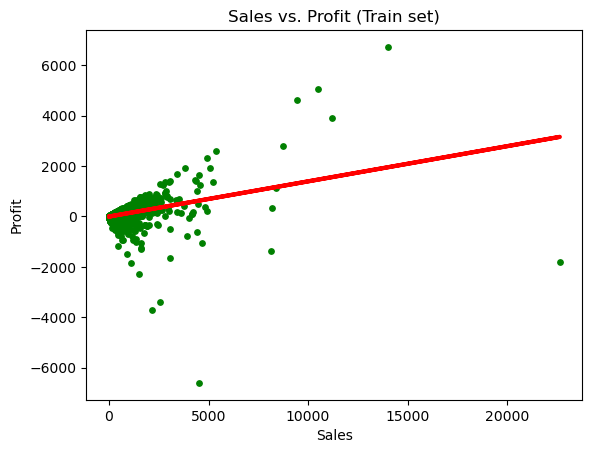

In [83]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs. Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [7]:
SS.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/16,12/16/15,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [11]:
SS['Order Date'].min()

'1/1/17'

In [12]:
SS['Order Date'].max()


'9/9/17'

In [85]:
SS.to_csv(os.path.join(path,'Superstore','Superstore 6_4'))